# SMS Spam Classifier using Machine Learning

## Workflow of model

- Data Preprocessing
- EDA
- Text Preprocessing
- Model Building
- Model Evaluation
- Improvement
- Website
- Deploy

## Importing dependencies

In [328]:
# importing dependencies

import numpy as np
import pandas as pd
import chardet
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
import string
nltk.download('stopwords')
from nltk.corpus import stopwords           # for removing stopwords
from nltk.stem.porter import PorterStemmer  # for stemming of text
from wordcloud import WordCloud             # for wordcloud diagram
from collections import Counter             # for creating dictionary from corpus of words

# for Model Training
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.preprocessing import LabelEncoder



from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier



# for model evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score


# for model improvement
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier

# for saving the model
import pickle


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Loading dataset

In [329]:
with open('spam.csv', 'rb') as f: result = chardet.detect(f.read())
encoding = result['encoding']
df = pd.read_csv('spam.csv', encoding=encoding , delimiter=",")


# df = pd.read_csv('spam.csv')
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2223,spam,"Thanks for your ringtone order, ref number K71...",NaN,NaN,NaN
2454,ham,Left dessert. U wan me 2 go suntec look 4 u?,NaN,NaN,NaN
3171,ham,Do u still have plumbers tape and a wrench we ...,NaN,NaN,NaN
4825,ham,"Haha, just what I was thinkin",NaN,NaN,NaN
3219,ham,Its like that hotel dusk game i think. You sol...,NaN,NaN,NaN


In [330]:
df.shape

(5572, 5)

In [331]:
# renaming the columns

df.rename(columns= {'v1':'target', 'v2' : 'text'}, inplace = True)
df.head()

,target,text,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [332]:
# columns

df.columns

Index(['target', 'text', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [333]:
# using label encoder for ham/spam

encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])

In [334]:
df.head()

,target,text,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [335]:
# checking for null values

df.isnull().sum()

target           0
text             0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [336]:
# checking for duplicate values

df.dropna(axis = 1, inplace = True)
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [337]:
# finding spam and ham counts

df['target'].value_counts()

0    4825
1     747
Name: target, dtype: int64

<Axes: xlabel='target', ylabel='count'>

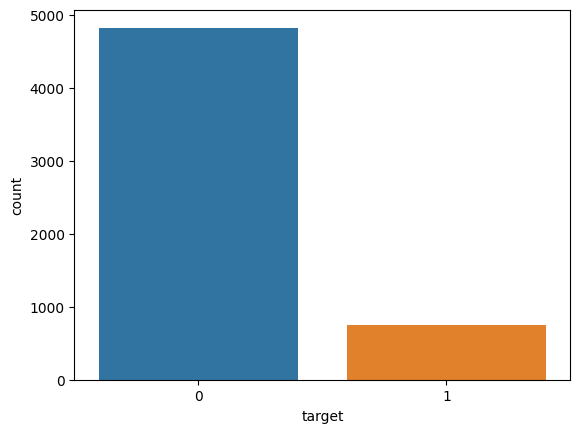

In [338]:
sns.countplot(x=df["target"])

# distribution of target

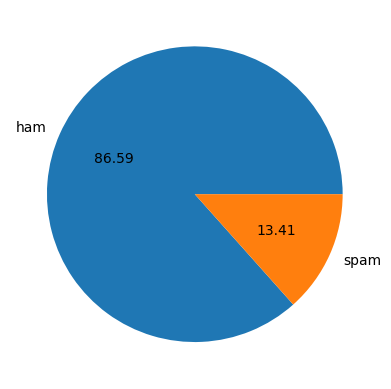

In [339]:
plt.pie(df['target'].value_counts(), labels = ['ham', 'spam'], autopct = "%0.2f")
plt.show()

In [340]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [341]:
df['characters']= df['text'].apply(len)
# calculating number of char in a text and inserting it to new column called characters

In [342]:
df.head()

,target,text,characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [343]:
# counting the  number of words
df['words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [344]:
df.head()

,target,text,characters,words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [345]:
# counting the  number of sentences
df['sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [346]:
df.head()

,target,text,characters,words,sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [347]:
df.describe()

,target,characters,words,sentences
count,5572.000000,5572.000000,5572.000000,5572.000000
mean,0.134063,80.118808,18.699390,1.996411
std,0.340751,59.690841,13.741932,1.520159
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,61.000000,15.000000,1.500000
75%,0.000000,121.000000,27.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [348]:
# describing ham messages

df[df['target'] == 0][['characters', 'words', 'sentences']].describe()

,characters,words,sentences
count,4825.000000,4825.000000,4825.000000
mean,71.023627,17.276269,1.837720
std,58.016023,13.988585,1.454388
min,2.000000,1.000000,1.000000
25%,33.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,92.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [349]:
# describing ham messages

df[df['target'] == 1][['characters', 'words', 'sentences']].describe()

,characters,words,sentences
count,747.000000,747.000000,747.000000
mean,138.866131,27.891566,3.021419
std,29.183082,6.867007,1.537580
min,13.000000,2.000000,1.000000
25%,132.500000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


## Visualization

<Axes: xlabel='characters', ylabel='Count'>

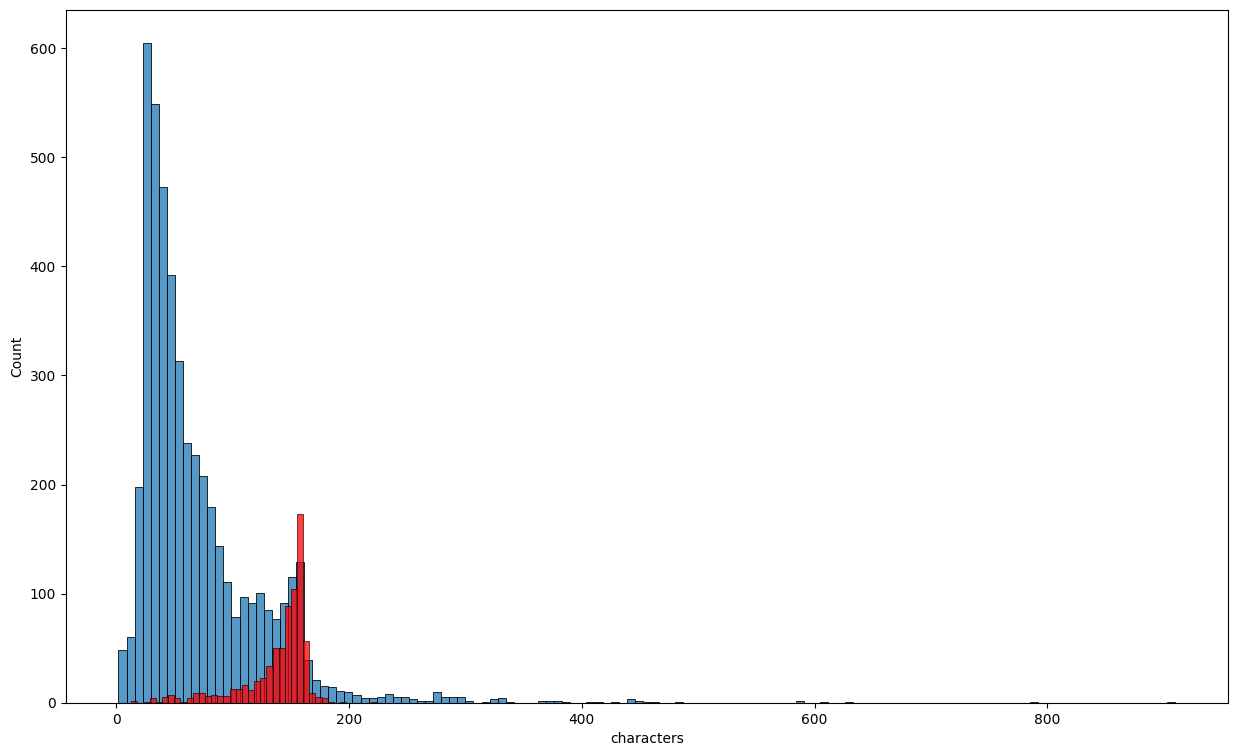

In [350]:
plt.figure(figsize = (15, 9))
sns.histplot(df[df['target'] == 0]['characters'])
sns.histplot(df[df['target'] == 1]['characters'], color = 'red')

<Axes: xlabel='words', ylabel='Count'>

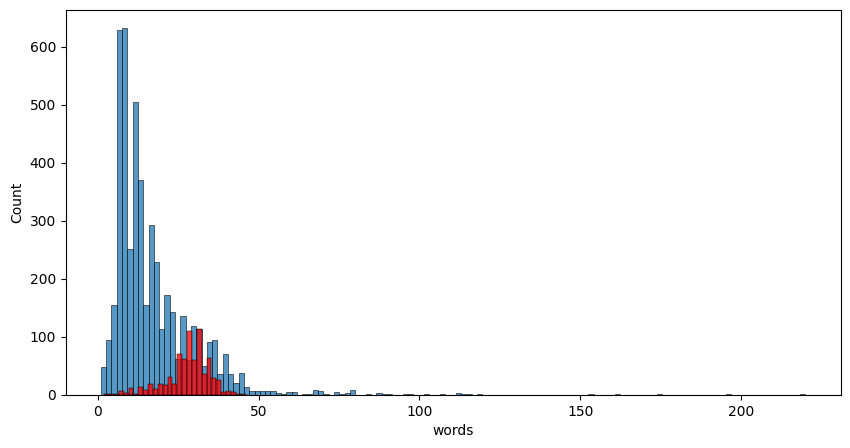

In [351]:
plt.figure(figsize = (10, 5))

sns.histplot(df[df['target'] == 0]['words'])
sns.histplot(df[df['target'] == 1]['words'], color = 'red')

<Axes: xlabel='sentences', ylabel='Count'>

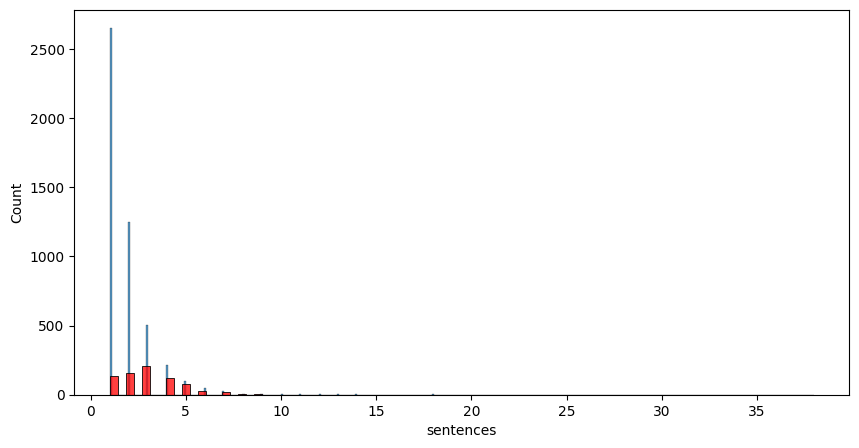

In [352]:
plt.figure(figsize = (10, 5))

sns.histplot(df[df['target'] == 0]['sentences'])
sns.histplot(df[df['target'] == 1]['sentences'], color = 'red')

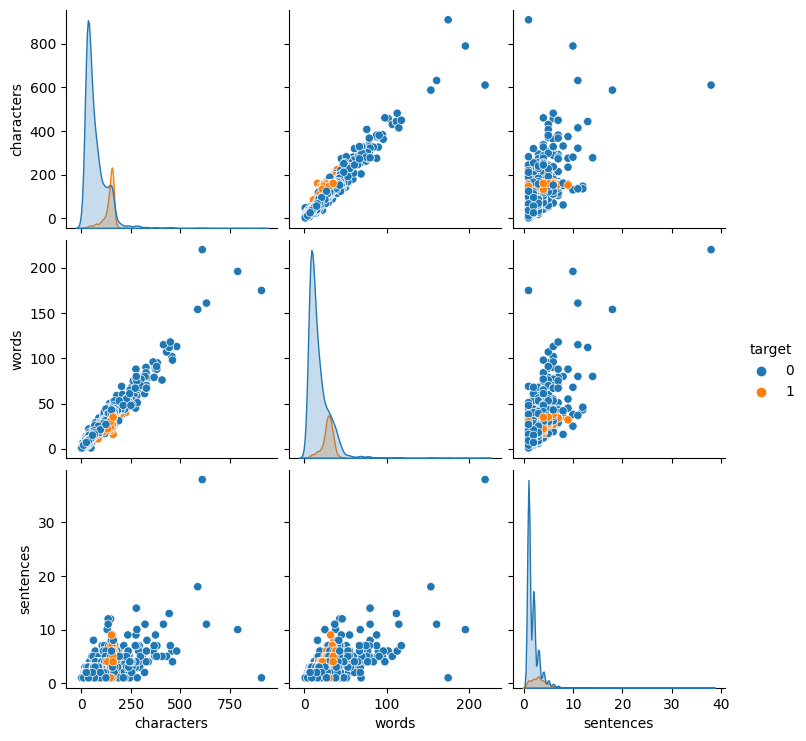

In [353]:
# pairplot

sns.pairplot(df, hue = 'target')

<ipython-input-354-311b1c932a48>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


<Axes: >

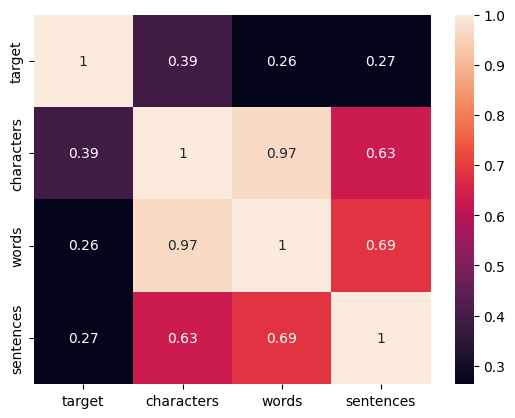

In [354]:
# heatmap of correlation of columns

sns.heatmap(df.corr(), annot = True)

## Text Pre-processing

Steps
  - Make text lower casee
  - Tokenizatin
  - Removing special characters
  - Removing stop words and punctuation
  - Stemming

In [355]:
df.columns

Index(['target', 'text', 'characters', 'words', 'sentences'], dtype='object')

In [356]:
ps = PorterStemmer()

def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)
  y = []
  for i in text:
    if i.isalnum():
      y.append(i)
  text = y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)
  text = y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)


In [357]:
def transform_text_with_stopwords(text):
  text = text.lower()
  text = nltk.word_tokenize(text)
  y = []
  for i in text:
    if i.isalnum():
      y.append(i)
  return y

In [358]:
print(transform_text_with_stopwords('HII MY NAME IS ANKIT NAINWAL Hii how are you I AM GOOD &#(*#$ #&&@*#* YOU KNOW ))'))
print(transform_text('HIIiiii  NAM IS ANKIT NAINWAL telling, however, something about yourself I AM GOOD &#(*#$ &@*#* YOU KNOW )) I am going to learning for understanding,for doing something'))

['hii', 'my', 'name', 'is', 'ankit', 'nainwal', 'hii', 'how', 'are', 'you', 'i', 'am', 'good', 'you', 'know']
hiiiiii nam ankit nainwal tell howev someth good know go learn understand someth


In [359]:
# # removing special characters
# def remove_sepcial(text):
#   y = []
#   for i in text:
#     if i.isalnum():
#       y.append(i)
#   return y

In [360]:
# list of stopwords

print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [361]:
print(transform_text(df['text'][0]))
print(transform_text(df['text'][1]))
print(transform_text(df['text'][10]))

go jurong point crazi avail bugi n great world la e buffet cine got amor wat
ok lar joke wif u oni
gon na home soon want talk stuff anymor tonight k cri enough today


In [362]:
# create new column for storing transformed text of dataset

df['transformed_text'] = df['text'].apply(transform_text)

In [363]:
df.head()

,target,text,characters,words,sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [364]:
wc = WordCloud(width = 700, height = 700, min_font_size = 10, background_color= 'grey')

In [365]:
# wordcloud for spam messages

spam_wordcloud = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

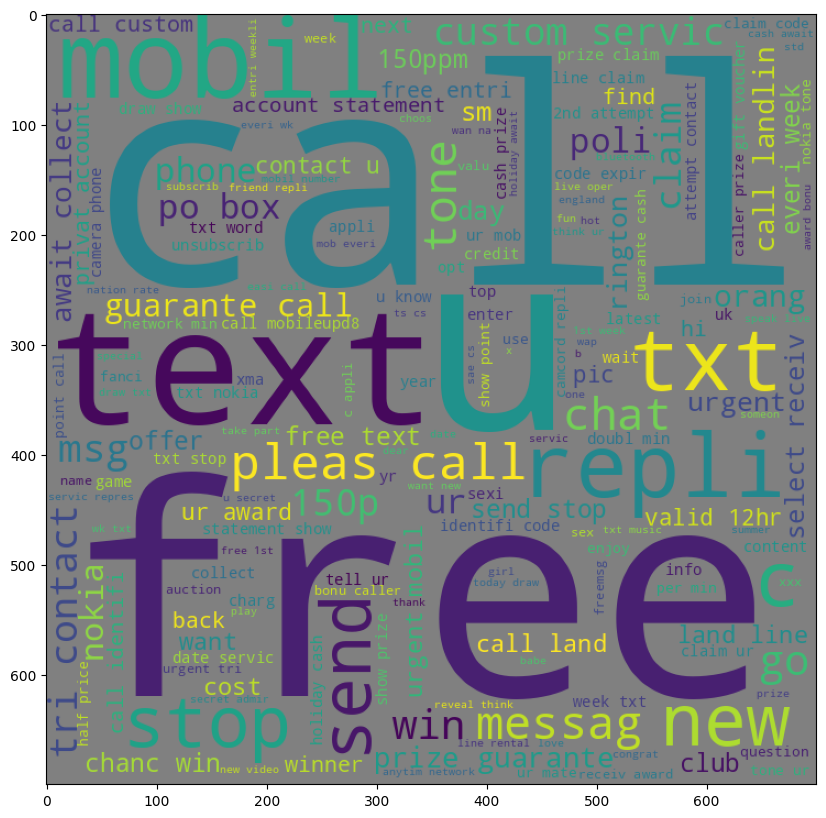

In [366]:
plt.figure(figsize=(16,10))
plt.imshow(spam_wordcloud)

In [367]:
# wordcloud for Ham messages

ham_wordcloud = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

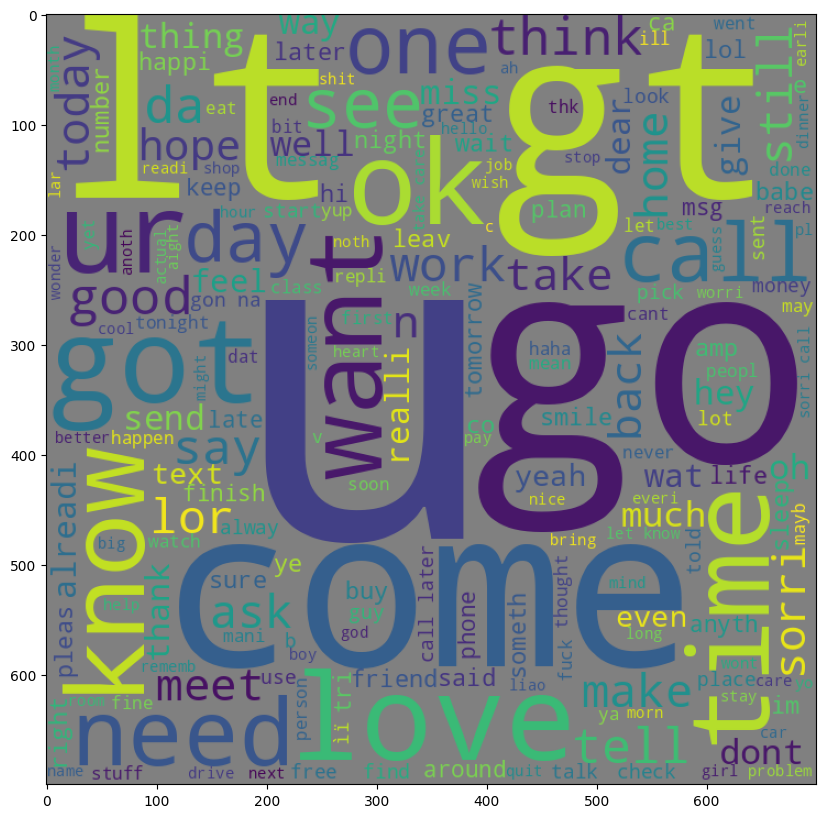

In [368]:
plt.figure(figsize=(16,10))
plt.imshow(ham_wordcloud)

In [369]:
# now we are going to find top 50 frequent word from both ham and spam messages

spam_corpus = []
for message in df[df['target'] == 1]['transformed_text'].tolist():
  for word in message.split():
    spam_corpus.append(word)



ham_corpus = []
for message in df[df['target'] == 0]['transformed_text'].tolist():
  for word in message.split():
    ham_corpus.append(word)

In [370]:
len(spam_corpus)

11490

In [371]:
len(ham_corpus)

38221

In [372]:
Counter(spam_corpus).most_common(30)

[('call', 365),
 ('free', 219),
 ('2', 174),
 ('txt', 169),
 ('ur', 144),
 ('u', 141),
 ('text', 139),
 ('mobil', 135),
 ('4', 120),
 ('claim', 115),
 ('stop', 114),
 ('repli', 112),
 ('prize', 94),
 ('get', 88),
 ('tone', 74),
 ('servic', 72),
 ('send', 70),
 ('new', 69),
 ('nokia', 68),
 ('award', 66),
 ('week', 62),
 ('cash', 62),
 ('urgent', 62),
 ('win', 61),
 ('contact', 61),
 ('pleas', 57),
 ('phone', 57),
 ('c', 51),
 ('custom', 51),
 ('collect', 51)]

In [373]:
Counter(ham_corpus).most_common(30)

[('u', 979),
 ('go', 417),
 ('get', 357),
 ('gt', 318),
 ('lt', 316),
 ('2', 300),
 ('come', 295),
 ('call', 291),
 ('know', 248),
 ('ok', 245),
 ('like', 244),
 ('got', 242),
 ('love', 241),
 ('ur', 237),
 ('good', 230),
 ('time', 228),
 ('want', 212),
 ('day', 212),
 ('need', 174),
 ('one', 174),
 ('4', 163),
 ('lor', 162),
 ('home', 161),
 ('sorri', 156),
 ('see', 153),
 ('think', 151),
 ('da', 150),
 ('take', 149),
 ('still', 148),
 ('n', 139)]

In [374]:
pd.DataFrame(Counter(spam_corpus).most_common(20))

,0,1
0,call,365
1,free,219
2,2,174
3,txt,169
4,ur,144
5,u,141
6,text,139
7,mobil,135
8,4,120
9,claim,115


In [375]:
pd.DataFrame(Counter(ham_corpus).most_common(20))

,0,1
0,u,979
1,go,417
2,get,357
3,gt,318
4,lt,316
5,2,300
6,come,295
7,call,291
8,know,248
9,ok,245


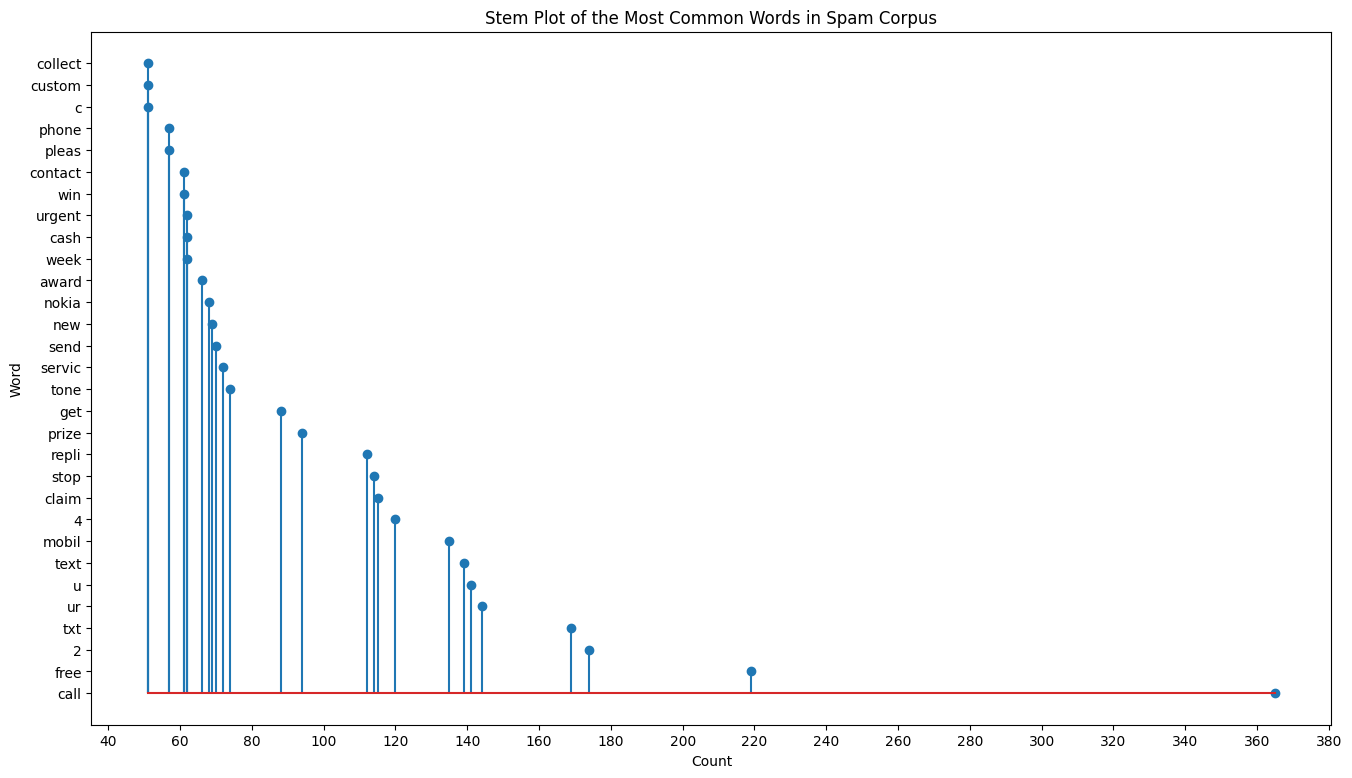

In [376]:
df1 = pd.DataFrame(Counter(spam_corpus).most_common(30)[:], columns=['Word', 'Count'])

# Set the column names
df1.columns = ['Word', 'Count']

# Create a stem plot
plt.figure(figsize=(16,9))
plt.stem(df1['Count'], df1['Word'])

# Add a title and labels to the axes
# Add a title and labels to the axes
plt.title('Stem Plot of the Most Common Words in Spam Corpus')
plt.xlabel('Count')
plt.ylabel('Word')
plt.xticks(np.arange(40, 400, 20))
# Show the plot
plt.show()

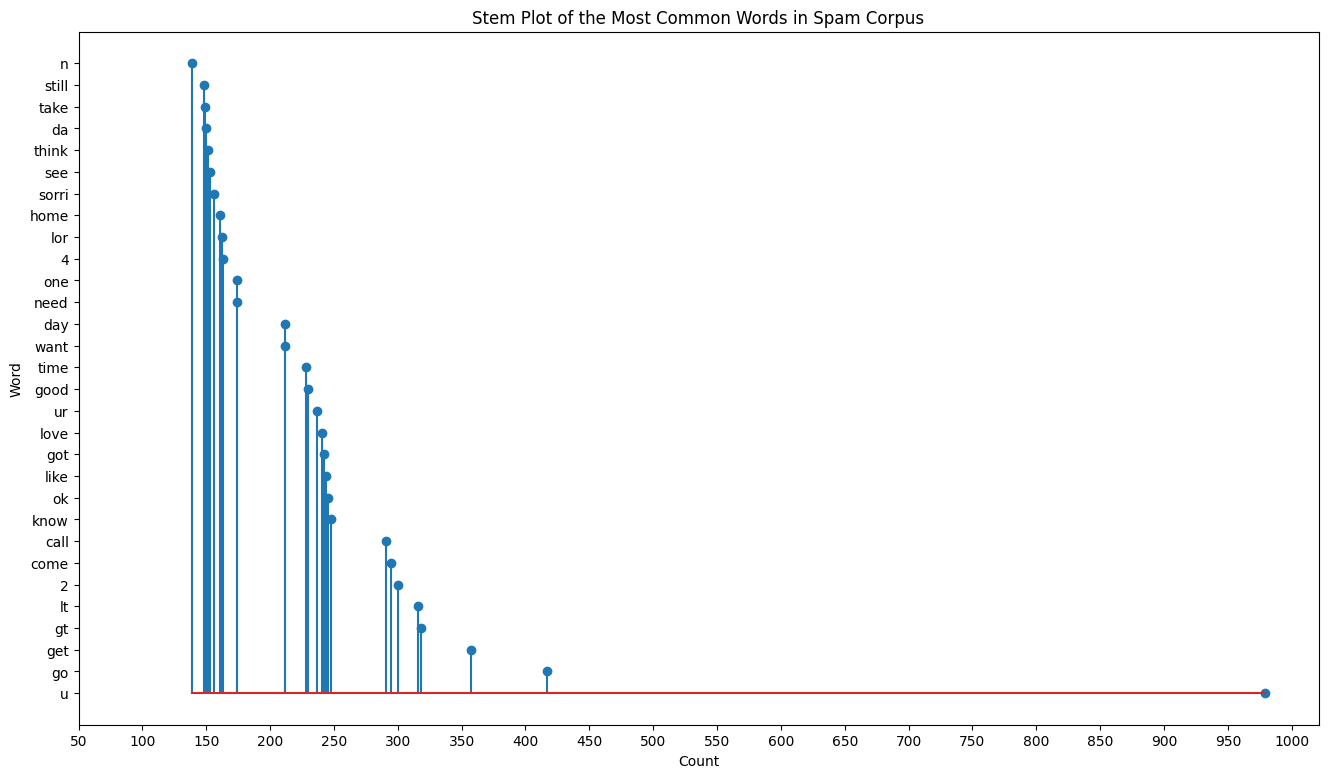

In [377]:
df2 = pd.DataFrame(Counter(ham_corpus).most_common(30)[:], columns=['Word', 'Count'])

# Set the column names
df2.columns = ['Word', 'Count']

# Create a stem plot
plt.figure(figsize=(16,9))
plt.stem(df2['Count'], df2['Word'])

# Add a title and labels to the axes
# Add a title and labels to the axes
plt.title('Stem Plot of the Most Common Words in Spam Corpus')
plt.xlabel('Count')
plt.ylabel('Word')
plt.xticks(np.arange(50, 1050, 50) )

# Show the plot
plt.show()

## Model Building
- using naive bayes, as it shows good results for textual data

In [378]:

cv = CountVectorizer()

# Count vectorizer works by counting the number of times each word appears in a document.
# This creates a sparse matrix, where each row represents a document and each column represents a word.
#  The value in each cell of the matrix is the number of times the word appears in the document.

# tfidf = TfidfVectorizer()
tfidf = TfidfVectorizer(max_features = 3000)

# The TF-IDF score is a measure of how important a word is to a document,
# taking into account how often the word appears in the document and how often it appears in other documents.

In [379]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [380]:
# scaling

# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)

In [381]:
X.shape

(5572, 3000)

In [382]:
y = df['target'].values

In [383]:
y.shape

(5572,)

In [384]:

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state =2)


In [385]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [386]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)

print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))


0.8672645739910314
[[841 116]
 [ 32 126]]
0.5206611570247934


In [387]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)

print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))


0.9650224215246637
[[956   1]
 [ 38 120]]
0.9917355371900827


In [388]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)

print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))


0.9748878923766816
[[955   2]
 [ 26 132]]
0.9850746268656716


In [389]:
# for this model, we are more aware about precision than accuracy, so we will go for mnb as it has precision score of 1

# tfidf ==> mnb



## Using other Models

In [390]:
svc = SVC(kernel = 'sigmoid', gamma = 1.0) # A higher gamma value means that each training example will have a greater influence on the decision boundary.
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth = 5)
lrc = LogisticRegression(solver = 'liblinear', penalty = 'l1') # liblinear is parameter specifies the solver to use,
# L1 penalty is a type of regularization that helps to prevent overfitting.

rfc = RandomForestClassifier(n_estimators= 50, random_state = 2)  # n_estimators : the number of trees in the forest,
# random_state : specifies the random seed that is used to initialize the random forest

abc = AdaBoostClassifier(n_estimators = 50, random_state = 2)
bc = BaggingClassifier(n_estimators = 50, random_state = 2)
etc = ExtraTreesClassifier(n_estimators = 50, random_state = 2)
gbdt = GradientBoostingClassifier(n_estimators = 50, random_state = 2)
xgb = XGBClassifier(n_estimators = 50, random_state=2)

In [391]:
classification = {
    'Support Vector Classifier' : svc,
    'K-Neighbors Classifier'  : knc,
    'Multinomial NB'  : mnb,
    'Decision Tree Classifier'  : dtc,
    'Logistic Regression'  : lrc,
    'Random Forest Classifier'  : rfc,
    'AdaBoost Classifier': abc,
    'Bagging Classifier' : bc,
    'Extra Trees Classifier' : etc,
    'Gradient Boosting Classifier' : gbdt,
    'XGB Classifier' : xgb
}

In [392]:
def train_classifier(classification, X_train, y_train, X_test, y_test):
  classification.fit(X_train, y_train)
  y_pred = classification.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  matrix = confusion_matrix(y_test, y_pred)

  return accuracy, precision, matrix

In [393]:
train_classifier(knc, X_train, y_train, X_test, y_test)

(0.9040358744394619,
 1.0,
 array([[957,   0],
        [107,  51]]))

In [394]:
accuracy_scores = []
precision_scores = []

for name, cls in classification.items():
  curr_accuracy, curr_precision, matrix = train_classifier(cls, X_train, y_train, X_test, y_test)
  print("Model name : ", name)
  print("Accuracy : ", curr_accuracy)
  print("Precision : ", curr_precision)
  print("Confusin-Matrix : ", matrix, '\n')

  accuracy_scores.append(curr_accuracy)
  precision_scores.append(curr_precision)



Model name :  Support Vector Classifier
Accuracy :  0.9713004484304932
Precision :  0.9846153846153847
Confusin-Matrix :  [[955   2]
 [ 30 128]] 

Model name :  K-Neighbors Classifier
Accuracy :  0.9040358744394619
Precision :  1.0
Confusin-Matrix :  [[957   0]
 [107  51]] 

Model name :  Multinomial NB
Accuracy :  0.9650224215246637
Precision :  0.9917355371900827
Confusin-Matrix :  [[956   1]
 [ 38 120]] 

Model name :  Decision Tree Classifier
Accuracy :  0.9246636771300448
Precision :  0.8775510204081632
Confusin-Matrix :  [[945  12]
 [ 72  86]] 

Model name :  Logistic Regression
Accuracy :  0.9515695067264573
Precision :  0.9642857142857143
Confusin-Matrix :  [[953   4]
 [ 50 108]] 

Model name :  Random Forest Classifier
Accuracy :  0.9659192825112107
Precision :  0.9838709677419355
Confusin-Matrix :  [[955   2]
 [ 36 122]] 

Model name :  AdaBoost Classifier
Accuracy :  0.9596412556053812
Precision :  0.959349593495935
Confusin-Matrix :  [[952   5]
 [ 40 118]] 

Model name :  B

In [395]:
performance_df = pd.DataFrame({'Algorithm': classification.keys(), 'Accuracy': accuracy_scores, 'Precision' : precision_scores}).sort_values('Precision', ascending = False)

In [396]:
performance_df

,Algorithm,Accuracy,Precision
1,K-Neighbors Classifier,0.904036,1.000000
8,Extra Trees Classifier,0.971300,0.992188
2,Multinomial NB,0.965022,0.991736
0,Support Vector Classifier,0.971300,0.984615
5,Random Forest Classifier,0.965919,0.983871
10,XGB Classifier,0.961435,0.983193
4,Logistic Regression,0.951570,0.964286
6,AdaBoost Classifier,0.959641,0.959350
9,Gradient Boosting Classifier,0.936323,0.930693
7,Bagging Classifier,0.956951,0.916667


In [397]:
performance_df1 = pd.melt(performance_df, id_vars = 'Algorithm')

In [398]:
performance_df1

,Algorithm,variable,value
0,K-Neighbors Classifier,Accuracy,0.904036
1,Extra Trees Classifier,Accuracy,0.971300
2,Multinomial NB,Accuracy,0.965022
3,Support Vector Classifier,Accuracy,0.971300
4,Random Forest Classifier,Accuracy,0.965919
5,XGB Classifier,Accuracy,0.961435
6,Logistic Regression,Accuracy,0.951570
7,AdaBoost Classifier,Accuracy,0.959641
8,Gradient Boosting Classifier,Accuracy,0.936323
9,Bagging Classifier,Accuracy,0.956951


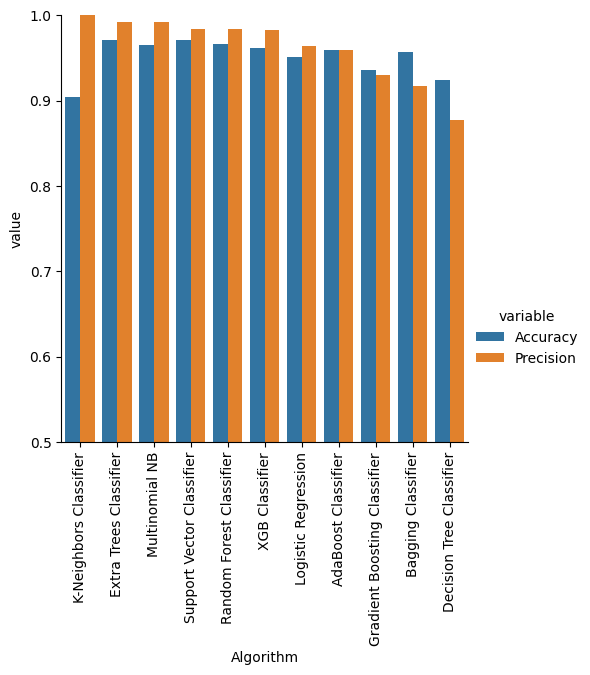

In [399]:
sns.catplot(x = 'Algorithm', y = 'value', hue = 'variable', data = performance_df1, kind = 'bar', height = 5)
plt.ylim(0.5, 1.0)
plt.xticks(rotation = 'vertical')
plt.show()

## Model Improvement

- TfidfVectorizer(max_features = 3000) : no better results appeared
- Scaling using MinMaxScaler
- Voting Classifier
- Applying Stacking

In [400]:
# temp_df = pd.DataFrame({'Algorithm': classification.keys(), 'Accuracy_new': accuracy_scores, 'Precision_new' : precision_scores}).sort_values('Precision_new', ascending = False)

In [ ]:
# performance_df.merge(temp_df, on = 'Algorithm')

# precision of NB and Extra trees classifier has been reduced

In [402]:
# voting classifier :  ensemble learning method that combines the predictions of several different machine learning models to produce a final prediction.
# The models that are combined can be of different types, such as decision trees, support vector machines, or random forests.


svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)


In [403]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [404]:
voting.fit(X_train, y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [405]:
y_pred = voting.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(precision_score(y_test, y_pred))


0.9775784753363229
[[957   0]
 [ 25 133]]
1.0


In [406]:
estimators = [('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator = RandomForestClassifier()

In [407]:
# Using stacking : Stacking is an ensemble learning technique that trains a meta-model on the predictions of
#  multiple base models to improve the overall performance of the ensemble.



clf = StackingClassifier(estimators = estimators, final_estimator = final_estimator)

In [408]:
clf.fit(X_train, y_train)

StackingClassifier(estimators=[('svm',
                                SVC(gamma=1.0, kernel='sigmoid',
                                    probability=True)),
                               ('nb', MultinomialNB()),
                               ('et',
                                ExtraTreesClassifier(n_estimators=50,
                                                     random_state=2))],
                   final_estimator=RandomForestClassifier())

In [409]:
y_pred = clf.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


0.9802690582959641
0.9788732394366197
[[954   3]
 [ 19 139]]


## Saving the model

In [410]:
# saving the model


pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))